In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

In [3]:
train_dir='./cats_and_dogs_small/train/'
validation_dir='./cats_and_dogs_small/validation/'
test_dir='./cats_and_dogs_small/test/'

In [16]:
train_datagen=keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2
)

test_datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_dataset=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    class_mode="binary"
)

validation_dataset=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
model=keras.models.Sequential()

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Conv2D(256,(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Conv2D(256,(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(512,activation="relu"))
model.add(keras.layers.Dense(512,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 256)     

In [18]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=['accuracy']
)

In [25]:
history=model.fit(
    train_dataset,
    epochs=100,
    steps_per_epoch=int(2000/32),
    validation_data=validation_dataset,
    validation_steps=int(1000/32)
)

Epoch 1/100
62/62 [==============================] - 226s 4s/step - loss: 0.6930 - accuracy: 0.5041 - val_loss: 0.6878 - val_accuracy: 0.7188
Epoch 2/100
62/62 [==============================] - 210s 3s/step - loss: 0.6888 - accuracy: 0.5498 - val_loss: 0.7459 - val_accuracy: 0.5312
Epoch 3/100
62/62 [==============================] - 210s 3s/step - loss: 0.6765 - accuracy: 0.5833 - val_loss: 0.6677 - val_accuracy: 0.5625
Epoch 4/100
62/62 [==============================] - 210s 3s/step - loss: 0.6518 - accuracy: 0.6133 - val_loss: 0.5678 - val_accuracy: 0.7812
Epoch 5/100
62/62 [==============================] - 208s 3s/step - loss: 0.6381 - accuracy: 0.6392 - val_loss: 0.5994 - val_accuracy: 0.6562
Epoch 6/100
62/62 [==============================] - 208s 3s/step - loss: 0.6274 - accuracy: 0.6458 - val_loss: 0.5981 - val_accuracy: 0.6875
Epoch 7/100
62/62 [==============================] - 208s 3s/step - loss: 0.6083 - accuracy: 0.6707 - val_loss: 0.6467 - val_accuracy: 0.5938
Epoch 

62/62 [==============================] - 206s 3s/step - loss: 0.3931 - accuracy: 0.8262 - val_loss: 0.4745 - val_accuracy: 0.7188
Epoch 59/100
62/62 [==============================] - 207s 3s/step - loss: 0.3819 - accuracy: 0.8262 - val_loss: 0.4805 - val_accuracy: 0.7188
Epoch 60/100
62/62 [==============================] - 207s 3s/step - loss: 0.3813 - accuracy: 0.8318 - val_loss: 0.4620 - val_accuracy: 0.7500
Epoch 61/100
62/62 [==============================] - 206s 3s/step - loss: 0.3724 - accuracy: 0.8354 - val_loss: 0.5588 - val_accuracy: 0.6875
Epoch 62/100
62/62 [==============================] - 206s 3s/step - loss: 0.3792 - accuracy: 0.8354 - val_loss: 0.6759 - val_accuracy: 0.6875
Epoch 63/100
62/62 [==============================] - 206s 3s/step - loss: 0.3705 - accuracy: 0.8308 - val_loss: 0.7003 - val_accuracy: 0.6875
Epoch 64/100
62/62 [==============================] - 206s 3s/step - loss: 0.3745 - accuracy: 0.8425 - val_loss: 0.5696 - val_accuracy: 0.7500
Epoch 65/100

In [26]:
model.save('./catvsdog.h5')

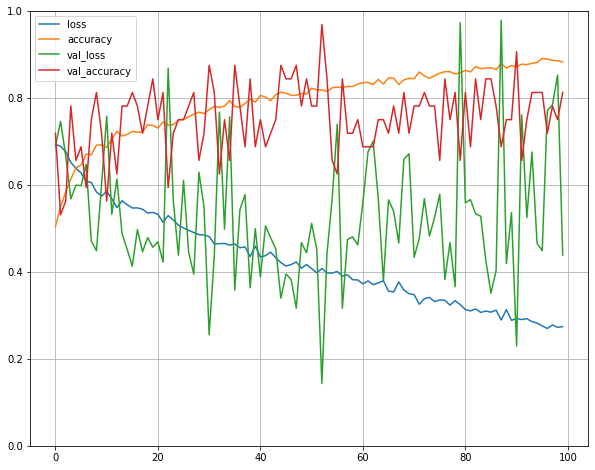

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10,8))
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()